   Sample in Buffer Sample in Window   TRIGGER ILA_hist_data[20:0]  \
0  Radix - UNSIGNED         UNSIGNED  UNSIGNED            UNSIGNED   
1                 0                0         1                   0   
2                 1                1         0                   7   
3                 2                2         0                   0   
4                 3                3         0                   5   

  ILA_hist_sel[7:0] LED_OBUF  
0            BINARY      HEX  
1          00000000        1  
2          00000001        1  
3          00000010        1  
4          00000011        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sample in Buffer     513 non-null    object
 1   Sample in Window     513 non-null    object
 2   TRIGGER              513 non-null    object
 3   ILA_hist_data[20:0]  513 non-null    ob

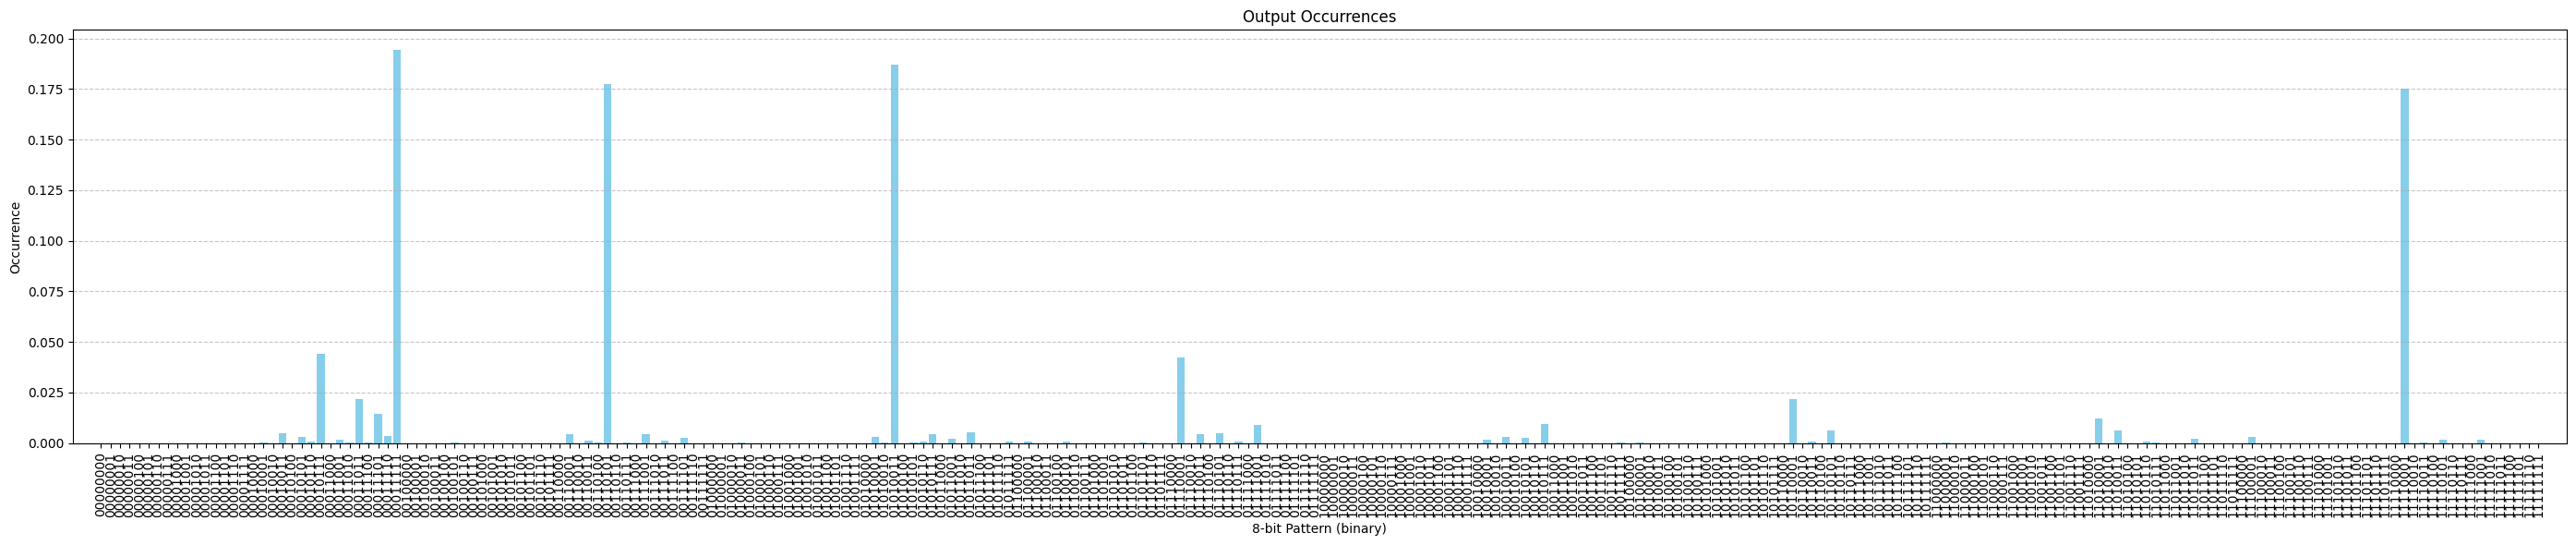

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Read the CSV file
df = pd.read_csv("iladata_Factor_15_500k.csv", low_memory=False)
# print(df)
print(df.head())
print(df.info())

# Select rows 513 to 602 (inclusive) from the relevant columns
subset = df.loc[1:256, ["ILA_hist_data[20:0]", "ILA_hist_sel[7:0]"]].copy()
print(subset)
# # Convert string columns to numeric (int or float)
subset["ILA_hist_data[20:0]"] = pd.to_numeric(subset["ILA_hist_data[20:0]"], errors="coerce")
subset["ILA_hist_sel[7:0]"] = subset["ILA_hist_sel[7:0]"].astype(str)

# Drop rows with NaNs (if any conversion failed)
subset.dropna(inplace=True)
# print(subset.iloc[64])
# # Create a bar plot using the "Pattern" as the x-axis and "Occurrence" as the y-axis.
plt.figure(figsize=(28, 6))
plt.bar(subset["ILA_hist_sel[7:0]"], subset["ILA_hist_data[20:0]"]/subset["ILA_hist_data[20:0]"].sum(), color='skyblue')
plt.xlabel("8-bit Pattern (binary)")
plt.ylabel("Occurrence")
plt.title("Output Occurrences")
plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# os.makedirs("Plots", exist_ok=True)
# plt.savefig(os.path.join("Plots", "TimeMUX_4x4=8"), dpi=300)
# plt.show()
print(subset["ILA_hist_data[20:0]"].sum())